# Optimisation: PSO

This example shows you how to run a global optimisation with [PSO (particle swarm optimisation)](http://pints.readthedocs.io/en/latest/optimisers/pso.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./first-example.ipynb).

Minimising error measure
Using Particle Swarm Optimisation (PSO)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time m:s
0     11     4e+07     4e+07      0:00.0
1     22     2.4e+07   2.4e+07    0:00.0
2     33     1.4e+07   1.4e+07    0:00.0
3     44     1.4e+07   1.4e+07    0:00.0
20    231    697707.2  697707.2   0:00.0
40    451    116012.9  116012.9   0:00.0
60    671    116012.9  116012.9   0:00.0
80    891    116012.9  116012.9   0:00.1
100   1111   116012.9  116012.9   0:00.1
120   1331   116012.9  116012.9   0:00.1
140   1551   116012.9  116012.9   0:00.1
160   1771   116012.9  116012.9   0:00.1
180   1991   116012.9  116012.9   0:00.1
200   2211   116012.9  116012.9   0:00.1
220   2431   116012.9  116012.9   0:00.1
228   2508   116012.9  116012.9   0:00.1
Halting: No significant change for 200 iterations.
Score at true solution: 
104011.91322907741
Found solution:          True parameters:
 1.49780422730576360e-02     1.49999999999999994e-02
 

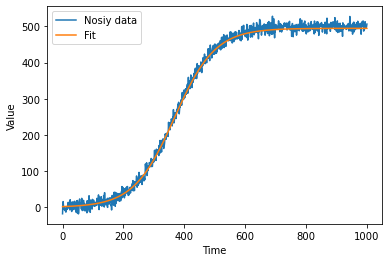

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])

# Perform an optimization with boundaries and hints
x0 = [0, 700]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.PSO,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(times, values, label='Nosiy data')
plt.plot(times, problem.evaluate(found_parameters), label='Fit')
plt.legend()
plt.show()